In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=1920
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
"Plant Village",
shuffle=True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 132 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['.ipynb_checkpoints', 'diseased', 'healthy']

In [5]:
len(dataset)

5

(32, 256, 256, 3)
[2 2 2 2 2 2 2 1 2 2 1 1 2 2 2 1 2 1 2 2 1 2 2 2 1 2 2 2 2 2 1 2]
[[[ 68.94531  109.90234   35.28125 ]
  [ 57.76172  100.15234   28.152344]
  [ 59.51172   99.51172   28.511719]
  ...
  [139.75     148.53125  124.53125 ]
  [166.9336   176.9336   152.9336  ]
  [173.50781  185.80078  161.21484 ]]

 [[ 73.04297  114.5       36.63672 ]
  [ 62.69922  104.69922   30.699219]
  [ 59.75      99.75      27.09375 ]
  ...
  [142.59766  148.11328  124.94141 ]
  [161.75     170.92188  149.40625 ]
  [155.92188  165.4375   145.92188 ]]

 [[ 74.52344  117.52344   35.523438]
  [ 67.58203  110.58203   31.582031]
  [ 58.796875  99.796875  23.796875]
  ...
  [149.6914   153.6914   130.6914  ]
  [160.98828  167.98828  151.98828 ]
  [156.0625   164.0625   151.15625 ]]

 ...

 [[101.53516  143.03516   31.035156]
  [105.41797  142.41797   37.41797 ]
  [111.97656  148.97656   43.691406]
  ...
  [163.33203  174.19922  183.91406 ]
  [154.64062  152.23438  165.4375  ]
  [145.39062  133.39062  147.

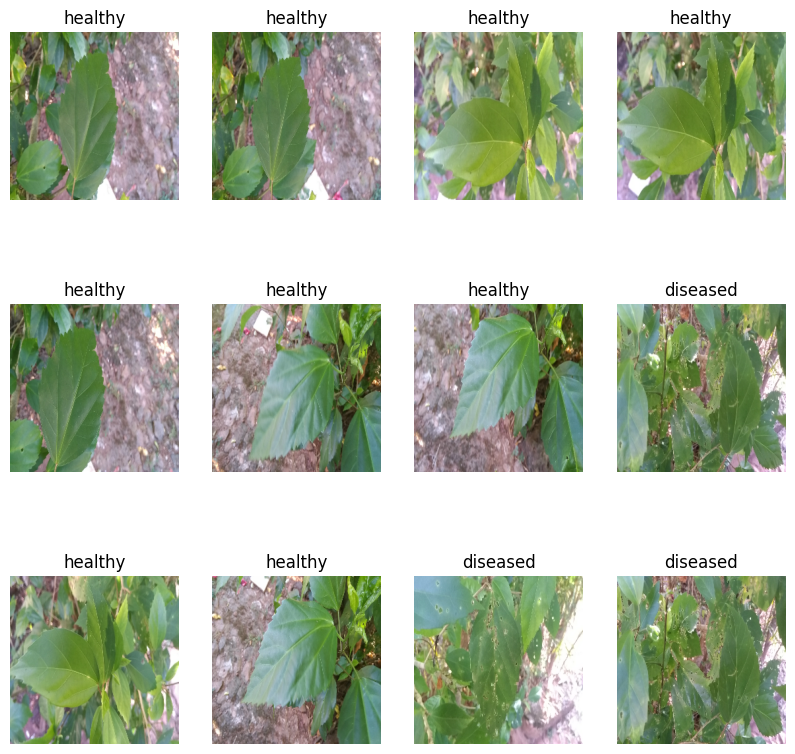

In [6]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        print(image_batch.shape)
        print(label_batch.numpy())
        print(image_batch[0].numpy())
        plt.title(class_names[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis("off")

In [7]:
len(dataset)

5

In [8]:
train_size=0.8
len(dataset)*train_size

4.0

In [9]:
train_ds=dataset.take(4)
len(train_ds)

4

In [10]:
test_ds=dataset.skip(4)
len(test_ds)

1

In [11]:
val_size=0.1
len(dataset)*val_size

0.5

In [12]:
val_ds=test_ds.take(6)
len(val_ds)

1

In [13]:
test_ds=test_ds.skip(6)
len(test_ds)

0

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset) 

In [16]:
len(train_ds)

4

In [17]:
len(test_ds)

1

In [18]:
len(val_ds)

0

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [21]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [22]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
    
)

Epoch 1/50
4/4 [==============================] - 6s 963ms/step - loss: 0.9899 - accuracy: 0.5400
Epoch 2/50
4/4 [==============================] - 4s 988ms/step - loss: 0.6920 - accuracy: 0.7800
Epoch 3/50
4/4 [==============================] - 4s 953ms/step - loss: 0.5502 - accuracy: 0.7800
Epoch 4/50
4/4 [==============================] - 4s 964ms/step - loss: 0.5267 - accuracy: 0.7800
Epoch 5/50
4/4 [==============================] - 5s 1s/step - loss: 0.5172 - accuracy: 0.7800
Epoch 6/50
4/4 [==============================] - 5s 1s/step - loss: 0.5100 - accuracy: 0.7800
Epoch 7/50
4/4 [==============================] - 5s 991ms/step - loss: 0.4892 - accuracy: 0.7800
Epoch 8/50
4/4 [==============================] - 4s 1s/step - loss: 0.4863 - accuracy: 0.7800
Epoch 9/50
4/4 [==============================] - 4s 1s/step - loss: 0.4315 - accuracy: 0.7800
Epoch 10/50
4/4 [==============================] - 4s 1000ms/step - loss: 0.4160 - accuracy: 0.7800
Epoch 11/50
4/4 [=============

In [26]:
scores = model.evaluate(test_ds)

1/1 [==============================] - 1s 887ms/step - loss: 6.3419e-05 - accuracy: 1.0000


In [27]:
scores

[6.341855623759329e-05, 1.0]

In [28]:
history

In [29]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 4}

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [38]:
acc = history.history['accuracy']

loss = history.history['loss']


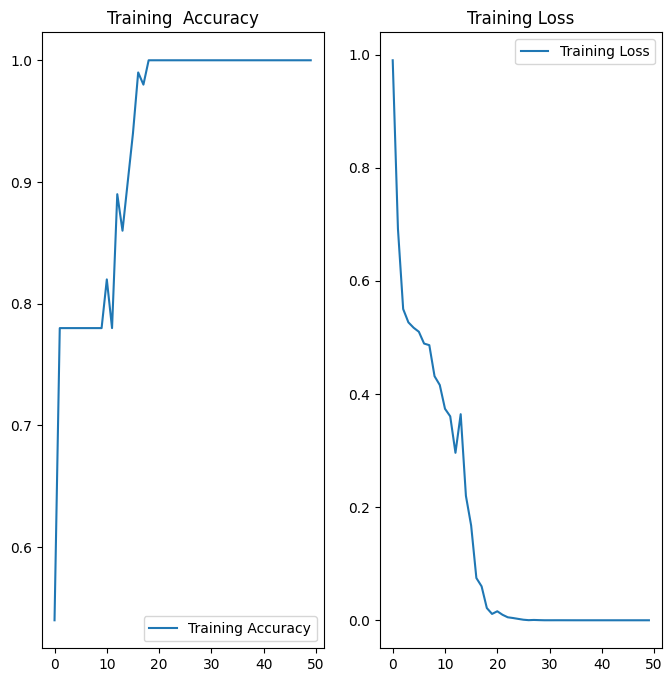

In [41]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training  Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()




first image to predict
actual label: healthy
1/1 [==============================] - 0s 405ms/step
predicted label: healthy


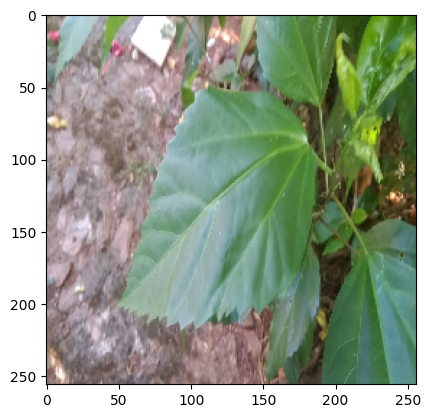

In [42]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [43]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 34ms/step


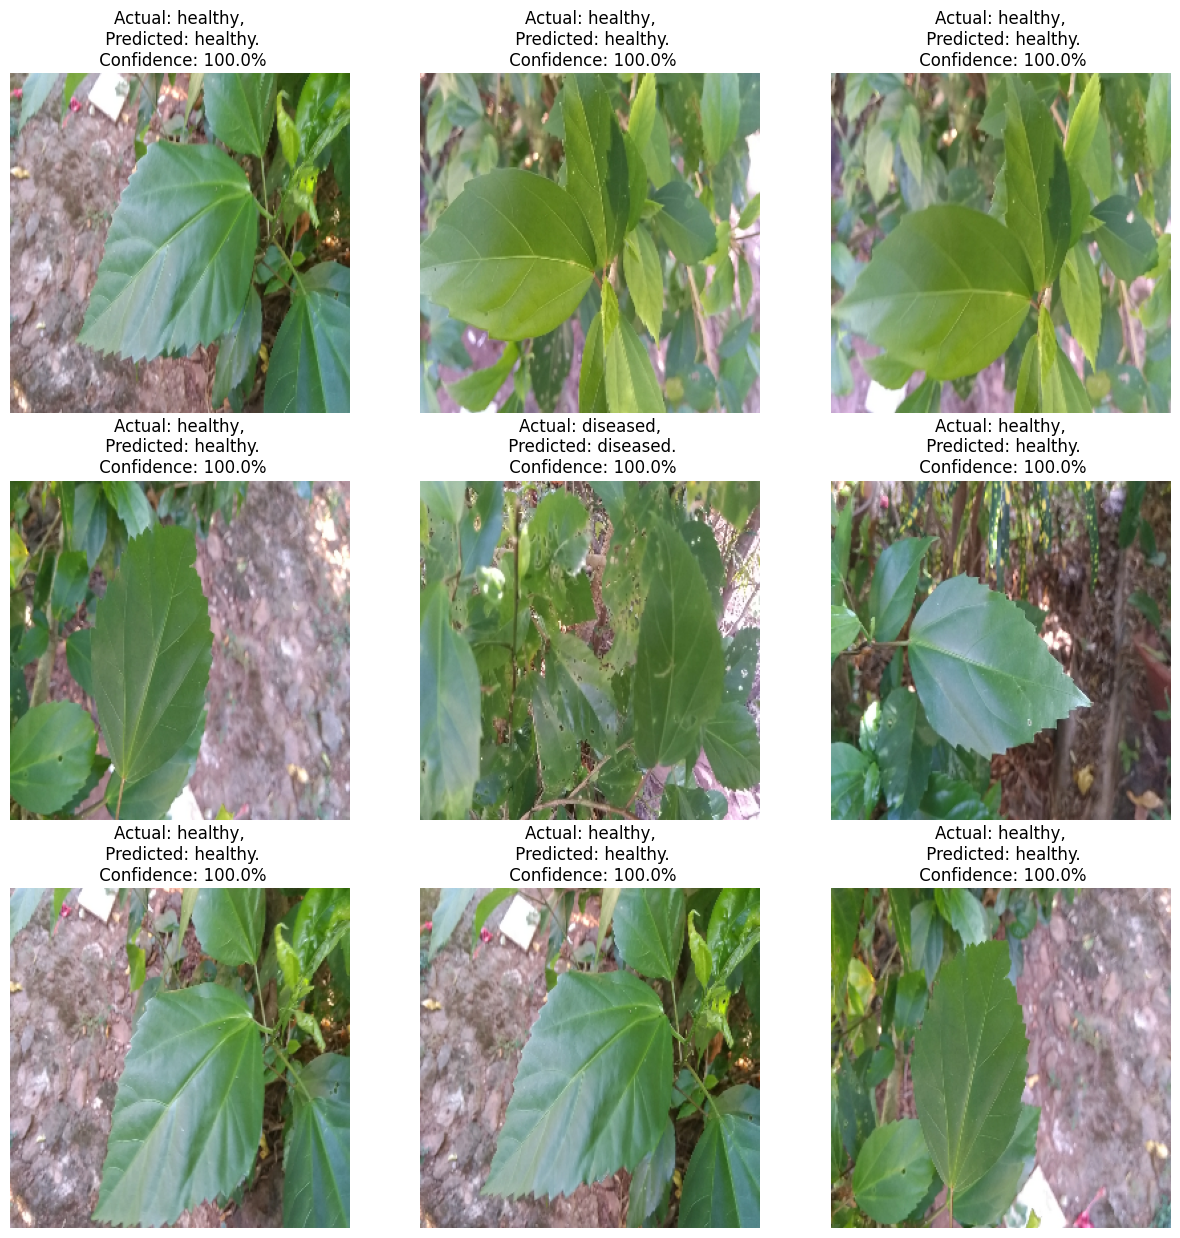

In [44]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")